# Comparison between AMR-Wind and Nalu-Wind 
_Comparison of 2.5m x 2.5m x 2.5m cases_
## Stable 5 m/s case

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import load_alldata
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
# Provide locations and parameters of data
l_cases = {
    'AMRWind 5 m/s':   load_alldata.AMRWind2Stats('../../AMRWindRuns/stable/05ms/sim_dx2.5'),  # 2.5m mesh
    'AMRWind 10 m/s':  load_alldata.AMRWind2Stats('../../AMRWindRuns/stable/10ms/sim_dx2.5'),  # 2.5m mesh
    'AMRWind 15 m/s':  load_alldata.AMRWind2Stats('../../AMRWindRuns/stable/15ms/sim_dx2.5'),  # 2.5m mesh
    #'NaluWind 5m/s':  load_alldata.NaluWindStats('../../NaluWindRuns/stable/05ms/05ms_Good_Mesh_2p5m/'),  # 2.5m mesh
}

In [3]:
# What kind of line styles to use in the plots
styles = {
    'AMRWind 5 m/s':           {'color':'b',         'lw':1, 'ls':'-.',  'plotspectra':False},  # 2.5m mesh
    'AMRWind 10 m/s':          {'color':'b',         'lw':1.5, 'ls':'--',  'plotspectra':False},  # 2.5m mesh
    'AMRWind 15 m/s':          {'color':'b',         'lw':2.5, 'ls':'-',   'plotspectra':False},  # 2.5m mesh
    'NaluWind 5m/s':          {'color':'b',         'lw':1, 'ls':'-.',  'plotspectra':True},  # 2.5m mesh
}

# Add the hub-height lines
hubheights = [20.0]
maxy       = 625

# Stuff for saving figures
savefigs = True
figdir   = 'presentation_figures/'
saveprefix = 'AMRWind_stable'

## Plot velocity profile

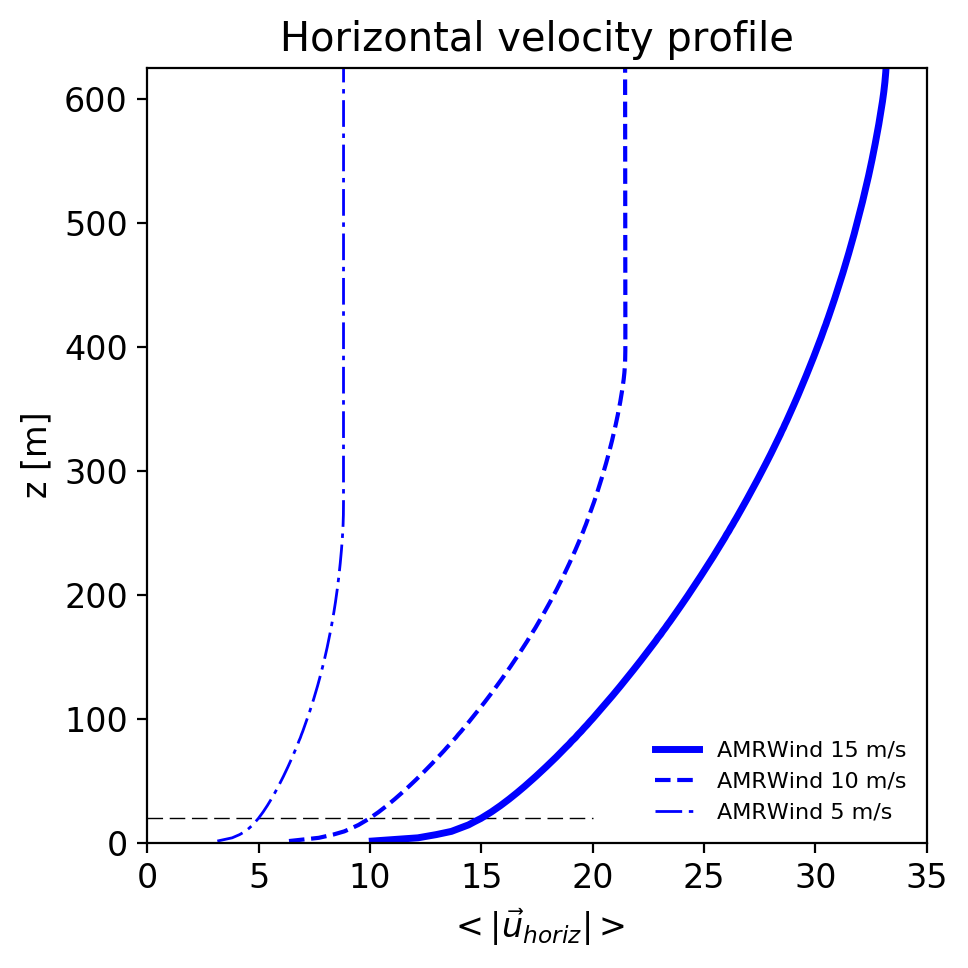

In [4]:
#fig = plt.figure(figsize=(10,8))
plt.rc('font', size=12)
#fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
Np=1
fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
axs = []; axs.append(ax)

for l,c in l_cases.items():
    ls=styles[l]
    for i in np.arange(Np): axs[i].plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in np.arange(Np): axs[i].hlines(hh, 0, 20, linestyles='dashed', linewidth=0.5)

for i in [0]:
    axs[i].set_xlabel(r'$< | \vec{u}_{horiz} | >$')
    axs[i].set_ylabel('z [m]')
    axs[i].set_xlim(0,35)
    axs[i].legend(frameon=False, prop={'size': 8})
    #axs[i].grid()
    axs[i].set_title('Horizontal velocity profile')

axs[0].set_ylim(0,maxy)
#axs[1].set_ylim(0,200)
plt.tight_layout()

if savefigs: plt.savefig(figdir+'/'+saveprefix+'_WS.png')

## Plot wind direction

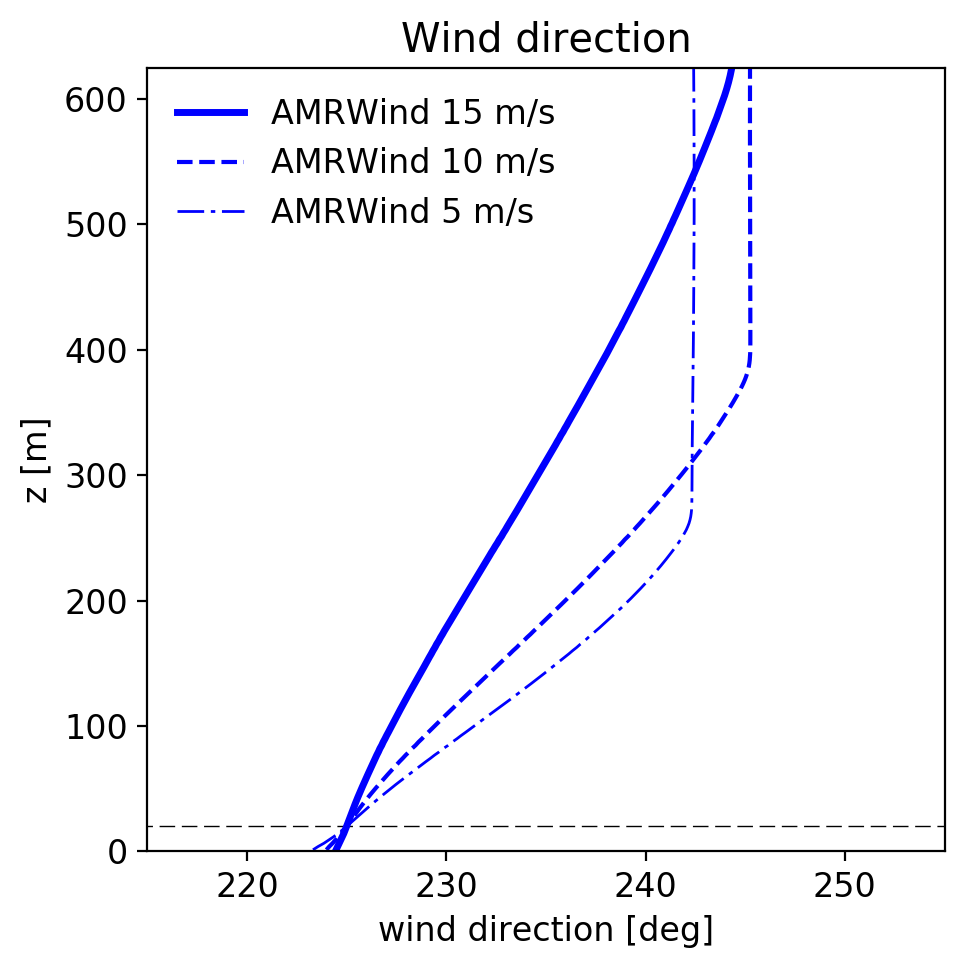

In [5]:
#fig = plt.figure(figsize=(10,8))
#fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
#plt.rc('font', size=16)
Np=1
fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
axs = []; axs.append(ax)

veer = lambda u, v: 270-np.arctan2(v, u)*180.0/np.pi
for l,c in l_cases.items():
    ls=styles[l]
    try: 
        for i in np.arange(Np): axs[i].plot(veer(c.u, c.v), c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    except:
        pass

for hh in hubheights: 
    for i in np.arange(Np): axs[i].hlines(hh, 200, 300, linestyles='dashed', linewidth=0.5)

for i in np.arange(Np):
    axs[i].set_xlabel(r'wind direction [deg]')
    axs[i].set_ylabel('z [m]')
    axs[i].legend(loc=0, frameon=False)
    axs[i].set_xlim(215, 255)
    #axs[i].grid()
    axs[i].set_title('Wind direction')

axs[0].set_ylim(0,maxy)
#axs[1].set_ylim(0,200)
plt.tight_layout()

if savefigs: plt.savefig(figdir+'/'+saveprefix+'_WDir.png')

## Plot the TI

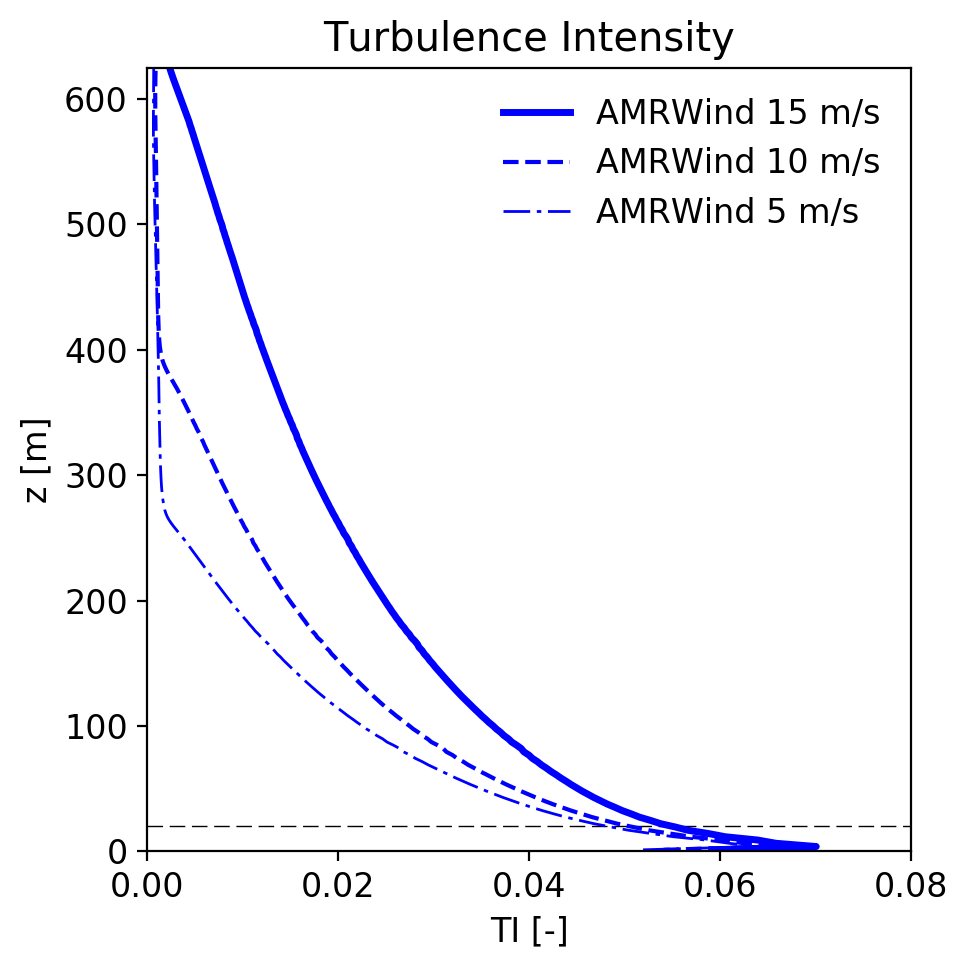

In [6]:
#TIcalc = lambda uu, vv, ww, U: np.sqrt(2.0/3.0*0.5(uu+vv+ww))/U
TIcalc = lambda uu, vv, ww, U: np.sqrt(2.0/3.0*0.5*(uu+vv+ww))/U

#fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
#plt.rc('font', size=16)
Np=1
fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
axs = []; axs.append(ax)

for l,c in l_cases.items():
    ls=styles[l]
    cTI = TIcalc(c.vel_var["<u'u'>"], c.vel_var["<v'v'>"], c.vel_var["<w'w'>"], c.hvelmag)
    for i in np.arange(Np): axs[i].plot(cTI, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in np.arange(Np): axs[i].hlines(hh, 0, 0.1, linestyles='dashed', linewidth=0.5)


for i in np.arange(Np):
    axs[i].set_xlabel(r'TI [-]')
    axs[i].set_ylabel('z [m]')
    axs[i].legend(loc=0, frameon=False)
    axs[i].set_xlim(0, 0.08)
    #axs[i].grid()
    axs[i].set_title('Turbulence Intensity')

axs[0].set_ylim(0,maxy)
#axs[1].set_ylim(0,200)
plt.tight_layout()

if savefigs: plt.savefig(figdir+'/'+saveprefix+'_TI.png')

## Plot Temperature

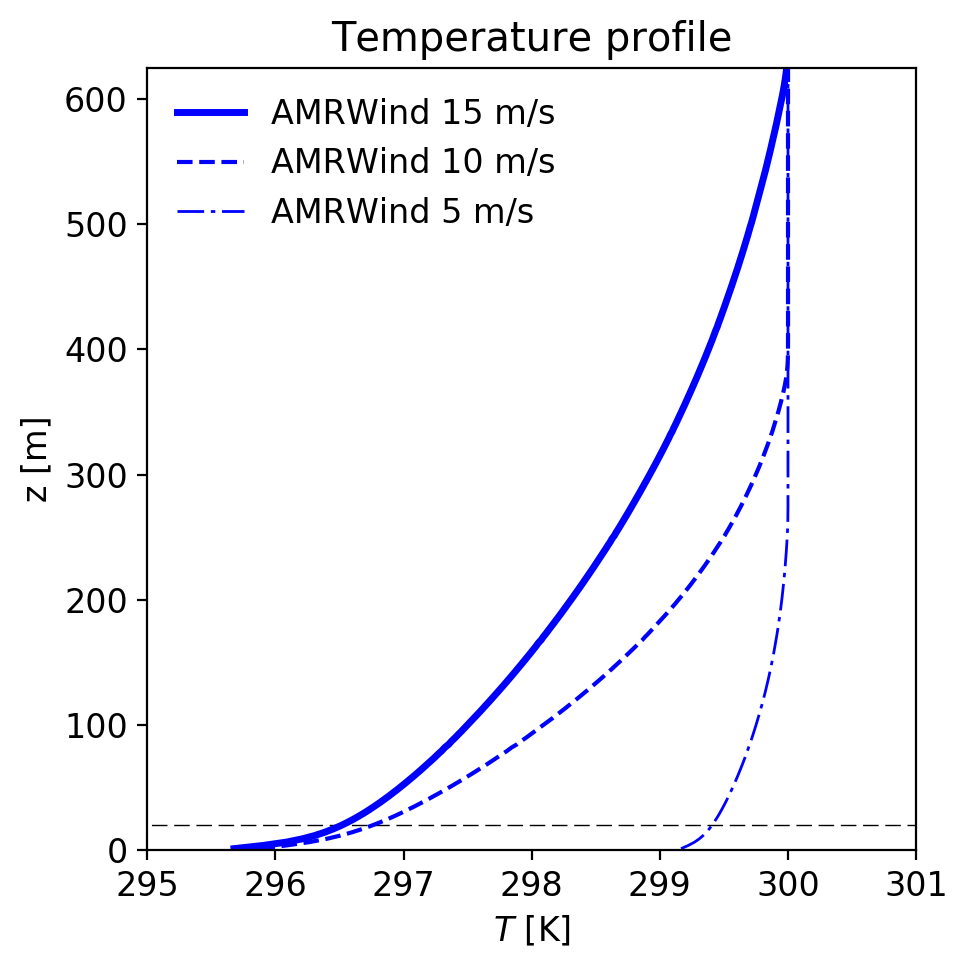

In [7]:
#fig = plt.figure(figsize=(10,8))
#fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
#plt.rc('font', size=16)
Np=1
fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
axs = []; axs.append(ax)

for l,c in l_cases.items():
    ls=styles[l]
    for i in np.arange(Np): axs[i].plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

for hh in hubheights: 
    for i in np.arange(Np): axs[i].hlines(hh, 290, 310, linestyles='dashed', linewidth=0.5)
    
axs[0].set_xlabel(r'$T$ [K]')
axs[0].set_ylabel('z [m]')
axs[0].legend(loc='upper left', frameon=False)
#axs[0].set_ylim(1020,1060); 
axs[0].set_xlim(295,301)
axs[0].set_ylim(0,maxy)
#axs[0].grid()
axs[0].set_title('Temperature profile')

#axs[1].set_xlabel(r'$<T>$')
#axs[1].set_ylabel('z')
#axs[1].legend(loc='upper left')
#axs[1].set_xlim(298,301)
#axs[1].set_ylim(0,200)
#axs[1].grid()
#axs[1].set_title('Stable 5 m/s Temperature profile')

plt.tight_layout()

if savefigs: plt.savefig(figdir+'/'+saveprefix+'_T.png')

## Plot reynolds stresses

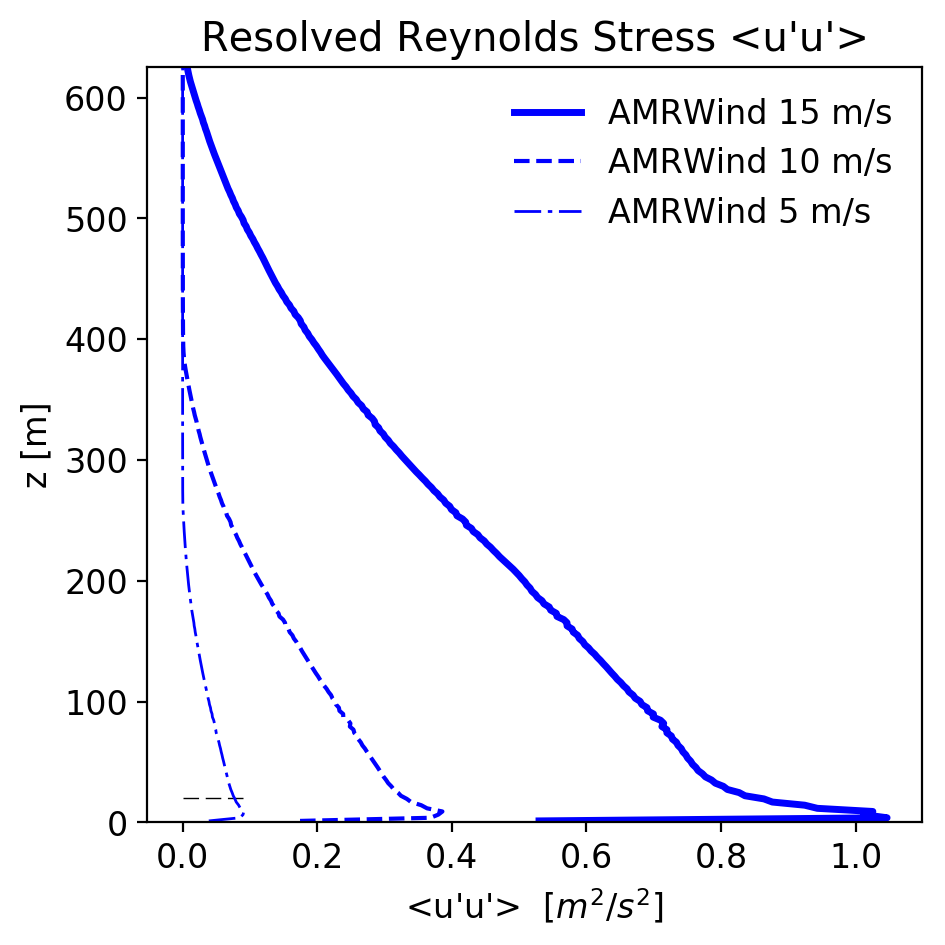

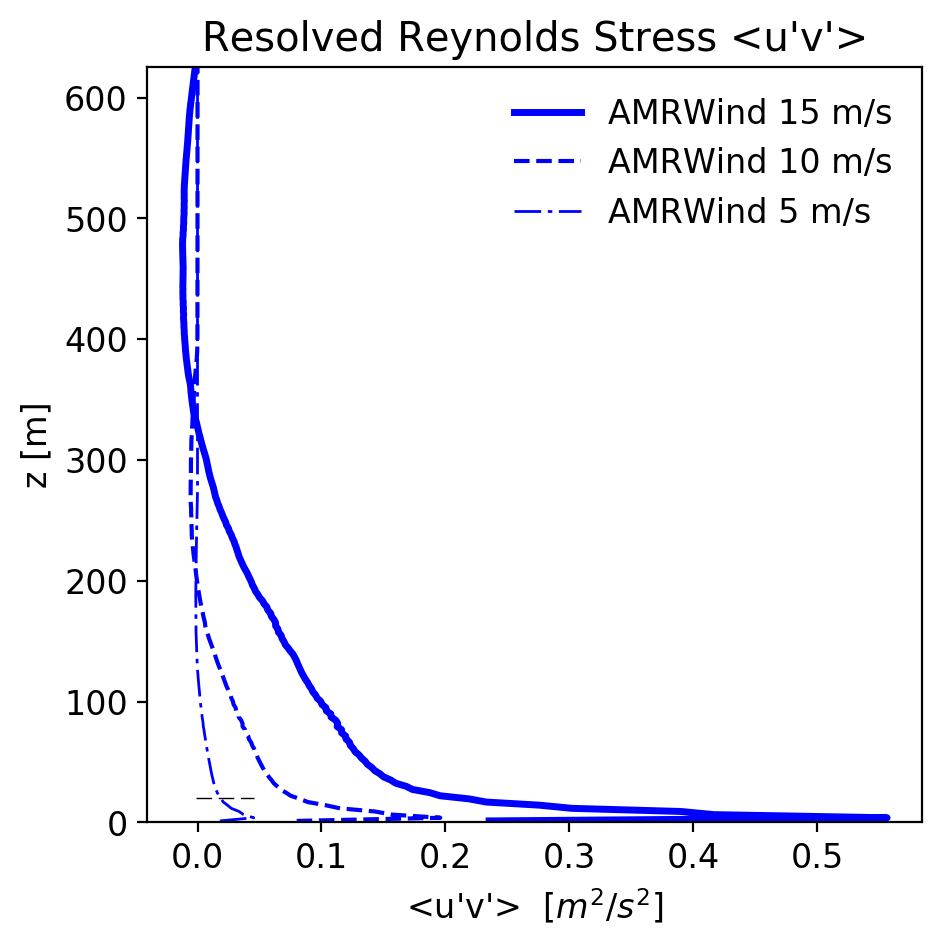

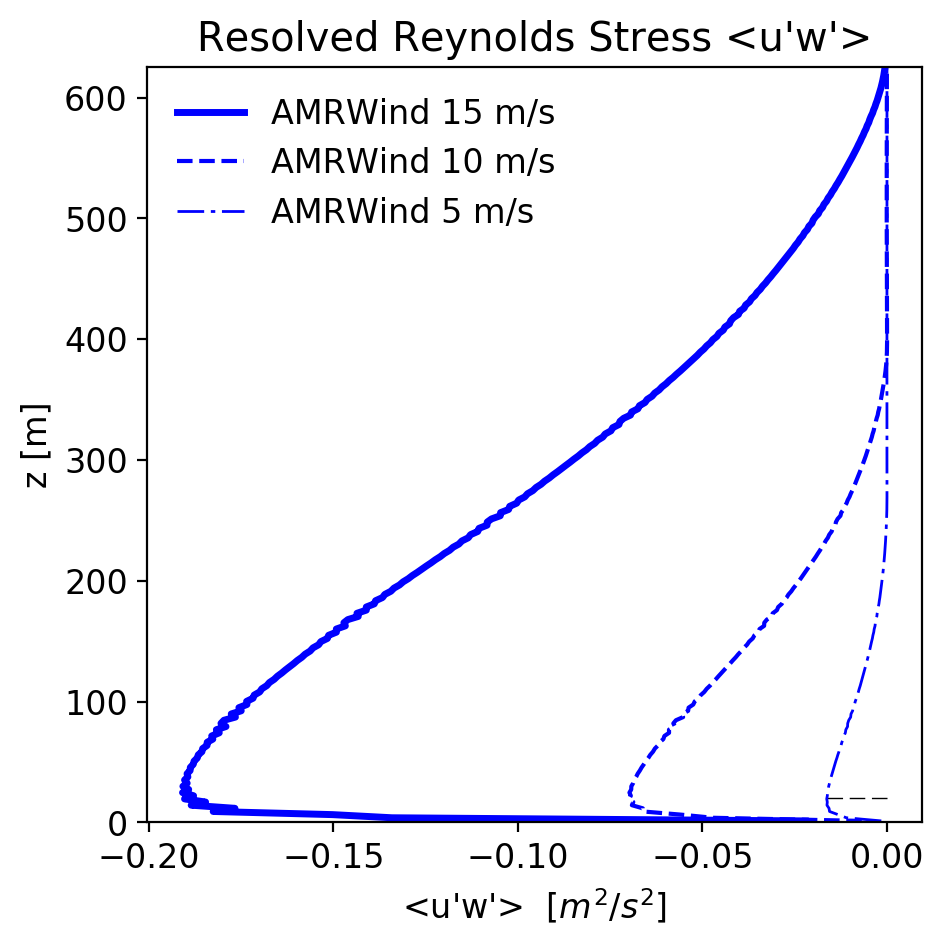

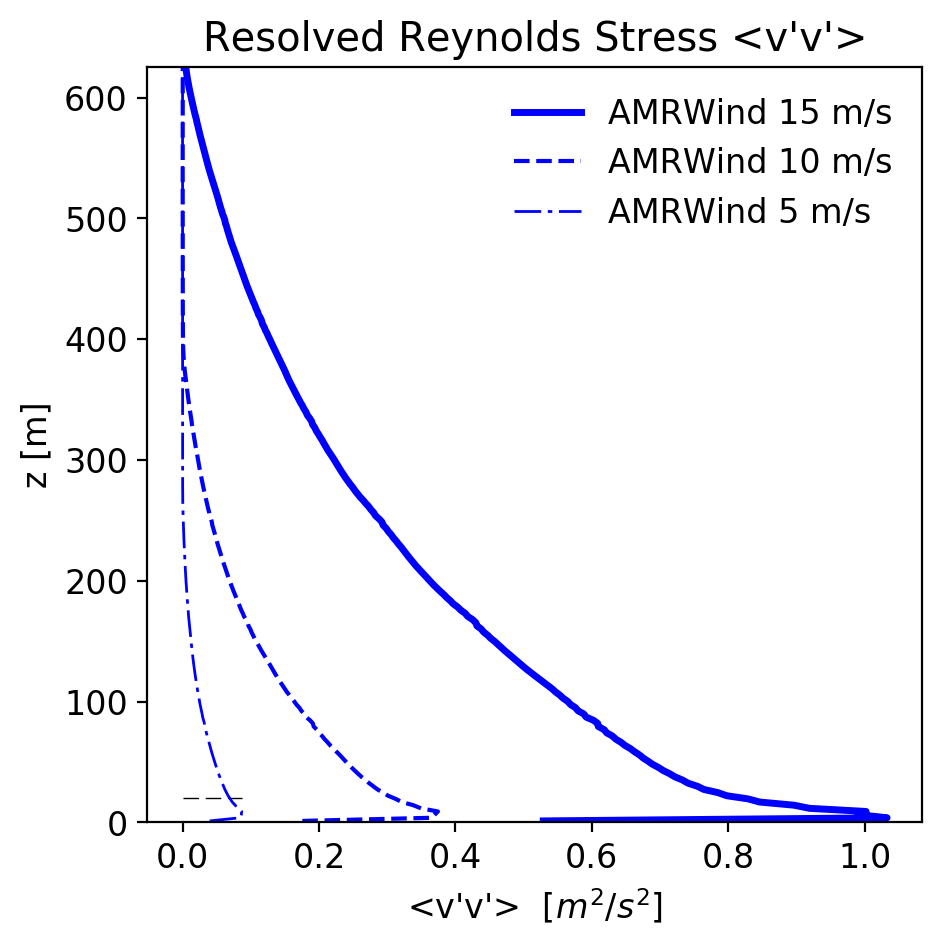

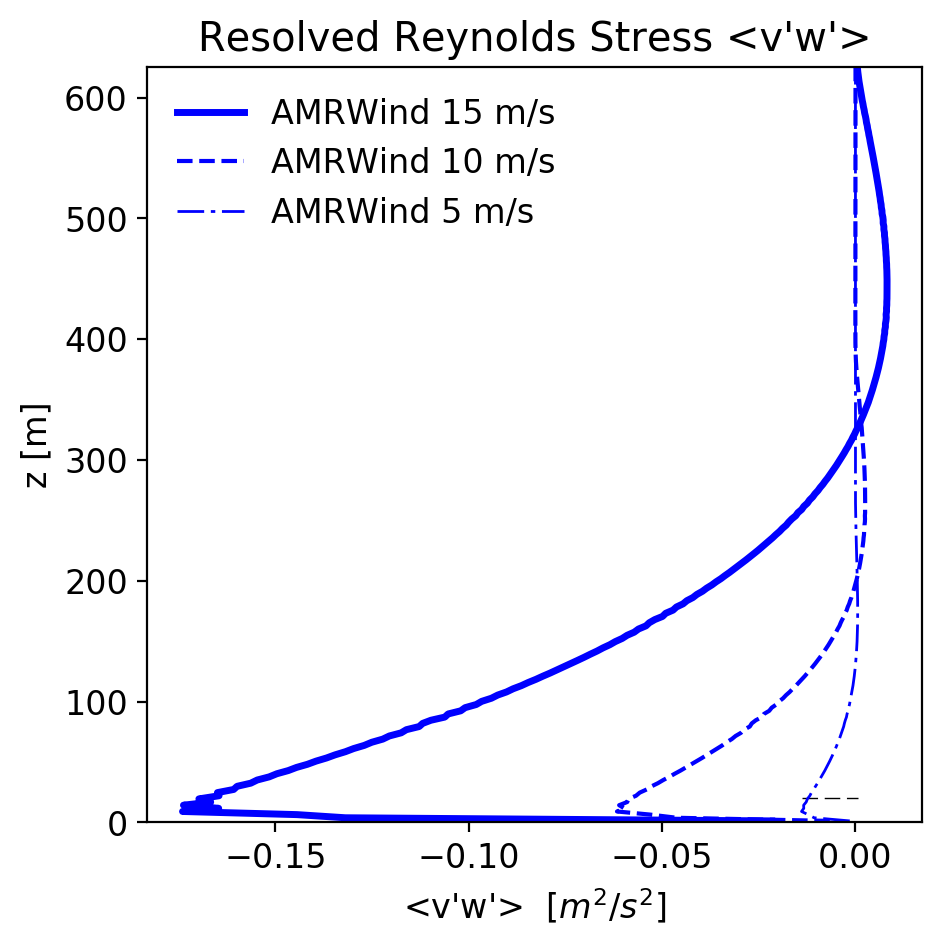

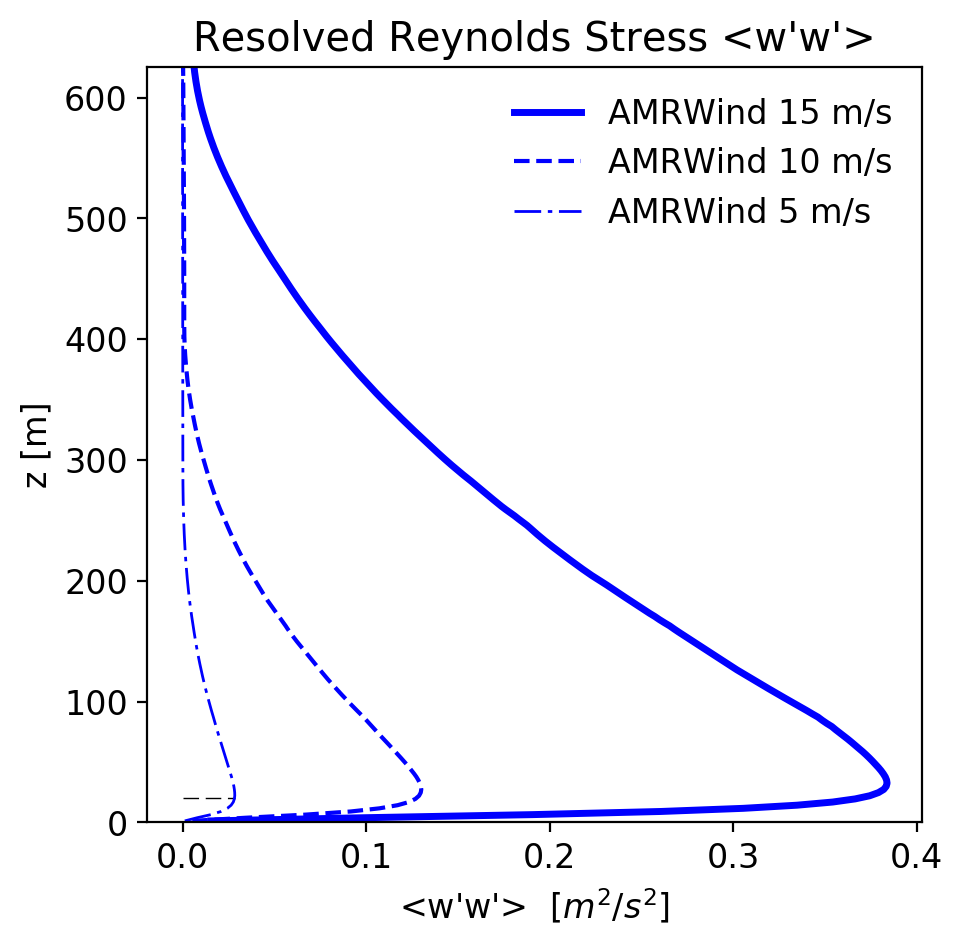

In [8]:
# Plot these stresses in this order
plotstresses=["<u'u'>", "<u'v'>", "<u'w'>", "<v'v'>", "<v'w'>", "<w'w'>"]

for stress in plotstresses:
    #fig = plt.figure(figsize=(7,7))
    #fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
    #plt.rc('font', size=14)
    Np=1
    fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
    axs = []; axs.append(ax)

    for l,c in l_cases.items():
        ls=styles[l]
        if (len(c.vel_var[stress])>0): 
            axs[0].plot(c.vel_var[stress], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
            #axs[1].plot(c.vel_var[stress], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    for hh in hubheights: 
        for i in np.arange(Np): axs[i].hlines(hh, min(c.vel_var[stress]), max(c.vel_var[stress]), linestyles='dashed', linewidth=0.5)
    axs[0].legend(frameon=False)
    axs[0].set_ylabel('z [m]')
    axs[0].set_xlabel(stress+'  [$m^2/s^2$]')
    axs[0].set_ylim([0,maxy])
    #axs[0].grid()
    axs[0].set_title('Resolved Reynolds Stress '+stress)
    
    #axs[1].legend()
    #axs[1].set_ylabel('z [m]')
    #axs[1].set_xlabel(stress+'  [$m^2/s^2$]')
    #axs[1].set_ylim([0,200])
    #axs[1].grid()
    #axs[1].set_title('Resolved Reynolds Stress '+stress+' (ground)')



## Plot temperature fluxes

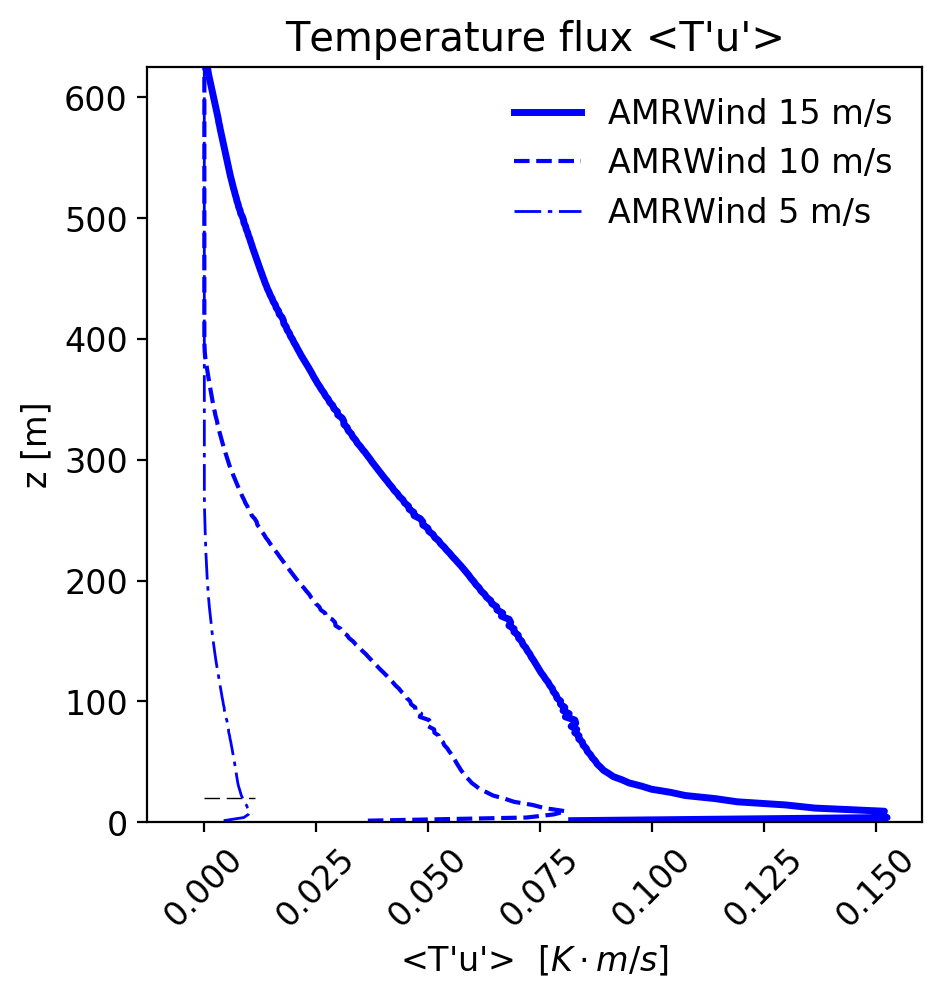

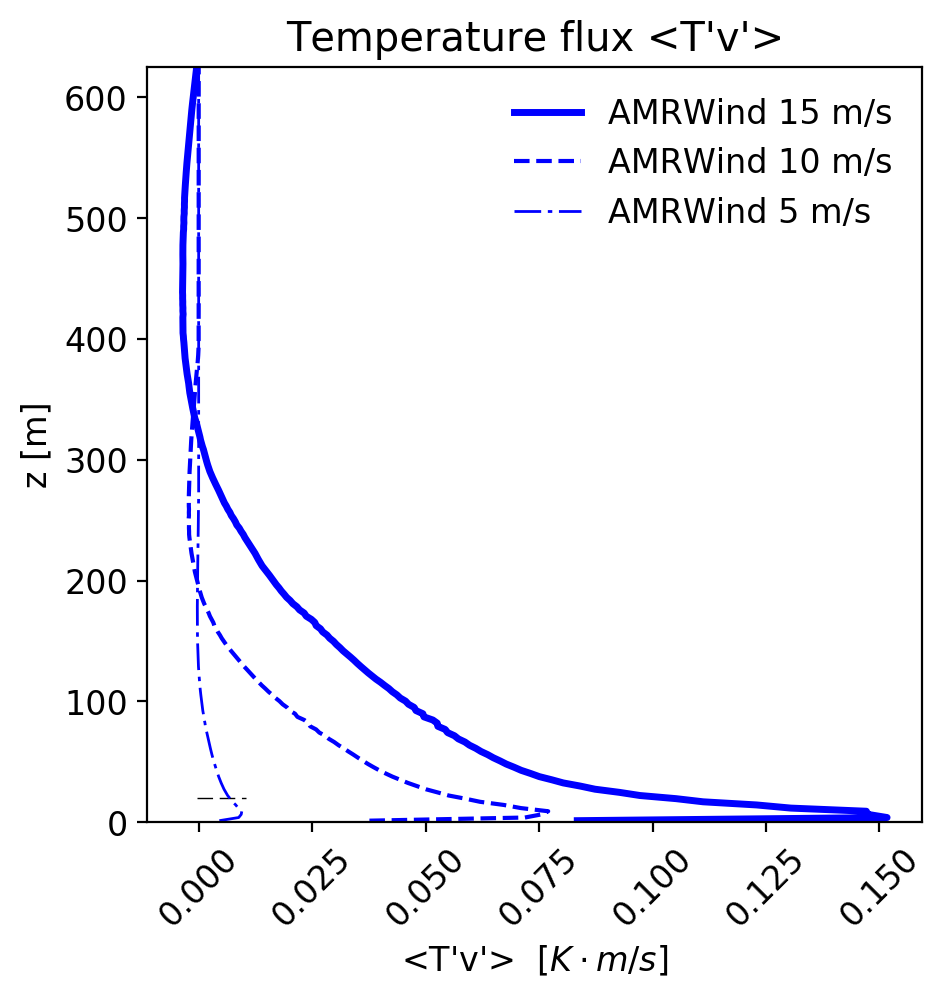

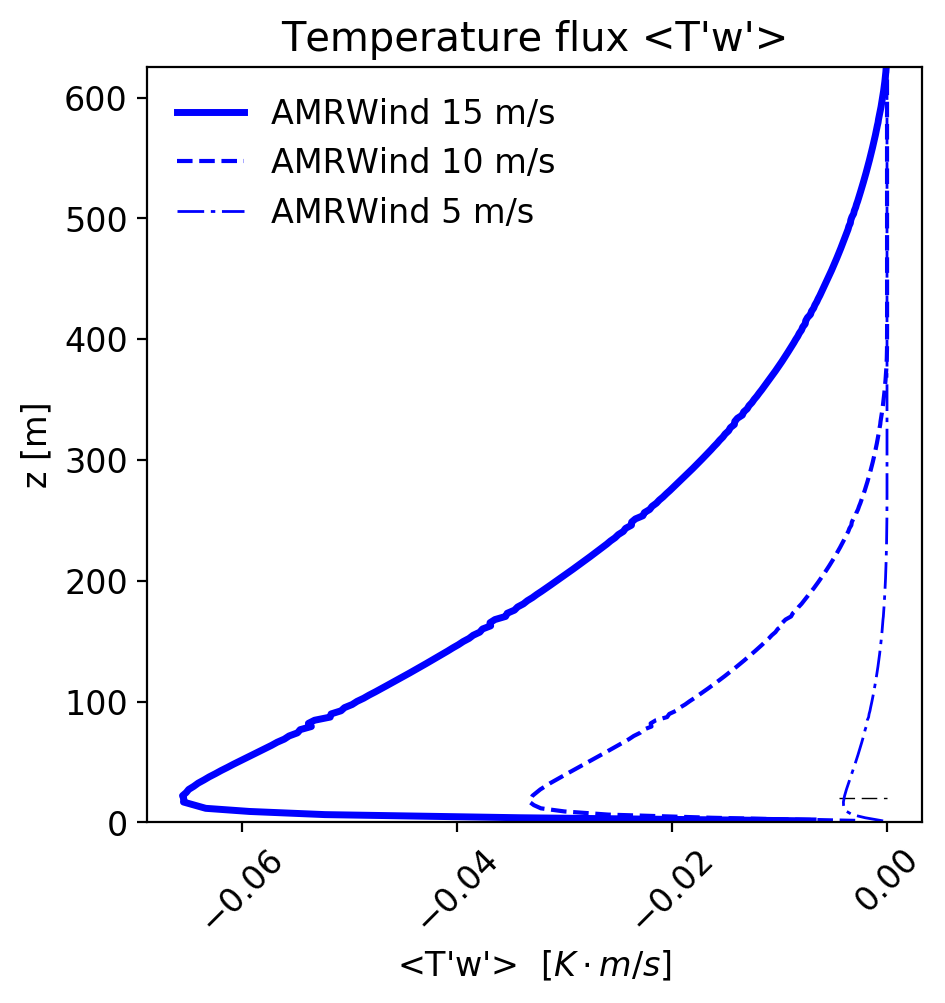

In [9]:
# Plot these stresses in this order
plotTfluxes=["<T'u'>", "<T'v'>", "<T'w'>"]

for flux in plotTfluxes:
    #fig = plt.figure(figsize=(7,7))
    #fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False)
    #plt.rc('font', size=16)
    
    Np=1
    fig, ax = plt.subplots(1,Np,figsize=(5,5),sharey=False, dpi=200)
    axs = []; axs.append(ax)

    for l,c in l_cases.items():
        ls=styles[l]
        if (len(c.vel_var[stress])>0): 
            axs[0].plot(c.tflux_var[flux], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
            #axs[1].plot(c.tflux_var[flux], c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
    for hh in hubheights: 
        for i in np.arange(Np): 
            axs[i].hlines(hh, 1.1*min(c.tflux_var[flux]), 1.1*max(c.tflux_var[flux]), linestyles='dashed', linewidth=0.5)
    axs[0].legend(frameon=False)
    axs[0].set_ylabel('z [m]')
    axs[0].set_xlabel(flux+'  [$K \cdot m/s$]')
    axs[0].set_ylim([0,maxy])
    #axs[0].grid()
    axs[0].set_title('Temperature flux '+flux)
    plt.xticks(rotation=45)
    
    #axs[1].legend(loc='upper left')
    #axs[1].set_ylabel('z [m]')
    #axs[1].set_xlabel(flux+'  [$K \cdot m/s$]')
    #axs[1].set_ylim([0,200])
    #axs[1].grid()
    #axs[1].set_title('Temperature flux '+flux+' (ground)')
    
    if savefigs and flux=="<T'w'>": plt.savefig(figdir+'/'+saveprefix+'_wTflux.png')

## Print some statistics

In [10]:
print("%30s %10s %10s %10s %10s"%("case","TI","alpha","utau","L"))
print("%30s %10s %10s %10s %10s"%("====","==","=====","====","==="))

for l,c in l_cases.items():
    # Get alpha
    if 'alpha' in c.istats: 
        alpha = float(c.istats['alpha'])
    else: 
        z        = c.z
        u_mag    = c.hvelmag 
        dudz     = (u_mag[1:]-u_mag[0:-1])/(z[1:]-z[0:-1])
        dudz     = np.append(dudz, dudz[-1])
        alphavec = z/u_mag*dudz
        alphaf   = interpolate.interp1d(z, alphavec)
        alpha    = alphaf(hubheights[0])
    # Get TI
    if 'TI' in c.istats: 
        TI = float(c.istats['TI'])
    else:
        z        = c.z
        u_mag    = c.hvelmag 
        tke      = 0.5*(c.vel_var["<u'u'>"] + c.vel_var["<v'v'>"] + c.vel_var["<w'w'>"])
        TIvec    = np.sqrt(2.0/3.0*tke)/u_mag
        TIf      = interpolate.interp1d(z, TIvec)
        TI       = TIf(hubheights[0])
    # Get utau
    if 'utau' in c.istats:   utau = float(c.istats['utau'])
    if 'ustar' in c.istats:  utau = float(c.istats['ustar'])
    # Get L
    L = float(c.istats['L'])
    print("%30s %10f %10f %10f %10f"%(l,TI, alpha, utau,L))

                          case         TI      alpha       utau          L
                          ====         ==      =====       ====        ===
                AMRWind 15 m/s   0.055034   0.118190   0.510645 131.341634
                AMRWind 10 m/s   0.050580   0.160337   0.318941  57.233491
                 AMRWind 5 m/s   0.048255   0.165552   0.157399  52.512434
